In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv("物流销售收入明细_2023年.csv")

# 一、数据评估与清洗

In [3]:
cleaned_data = original_data.copy()
cleaned_data.head()

,日期,物流单号,邮政编号,目的地,收货人,客户性别,客户年龄,年龄区间,托寄产品,销售数量,...,收入原价,物流增值费用收入,折扣金额,物流总收入,运费成本,仓储成本,其他运营成本,物流总成本,利润,利润率
0,2023-01-01 00:00:00,DML202301018160,65706,西北-陕西省-宝鸡,廖**,女,40,40-49,浴室用品,45,...,1909.35,42.37,15.46,1936.26,27.04,19.16,5.38,51.58,1884.68,0.9734
1,2023-01-01 00:00:00,DML202301012837,93445,华南-广东省-广州,蔡**,男,52,50-59,厨房电器,48,...,2283.84,3.22,18.27,2268.79,41.72,28.04,9.71,79.47,2189.32,0.9650
2,2023-01-01 00:00:00,DML202301012349,83814,华东-福建省-漳州,汤**,女,30,30-39,电脑硬件,65,...,2884.05,43.45,6.95,2920.55,48.66,10.59,11.99,71.24,2849.31,0.9756
3,2023-01-01 00:00:00,DML202301015287,76904,华东-浙江省-台州,谢*,男,48,40-49,家装饰品,68,...,1932.56,17.24,2.17,1947.63,95.84,13.16,15.22,124.22,1823.41,0.9362
4,2023-01-01 00:00:00,DML202301019388,35959,西南-重庆市-重庆,曾**,男,34,30-39,卧室家具,68,...,3330.64,41.36,8.69,3363.31,27.82,21.41,7.18,56.41,3306.90,0.9832


观察结论：
1.数据列未展现完整，将展示完整的列

In [4]:
pd.set_option("display.max_columns",100)
cleaned_data.head()

,日期,物流单号,邮政编号,目的地,收货人,客户性别,客户年龄,年龄区间,托寄产品,销售数量,物流单价,收入原价,物流增值费用收入,折扣金额,物流总收入,运费成本,仓储成本,其他运营成本,物流总成本,利润,利润率
0,2023-01-01 00:00:00,DML202301018160,65706,西北-陕西省-宝鸡,廖**,女,40,40-49,浴室用品,45,42.43,1909.35,42.37,15.46,1936.26,27.04,19.16,5.38,51.58,1884.68,0.9734
1,2023-01-01 00:00:00,DML202301012837,93445,华南-广东省-广州,蔡**,男,52,50-59,厨房电器,48,47.58,2283.84,3.22,18.27,2268.79,41.72,28.04,9.71,79.47,2189.32,0.9650
2,2023-01-01 00:00:00,DML202301012349,83814,华东-福建省-漳州,汤**,女,30,30-39,电脑硬件,65,44.37,2884.05,43.45,6.95,2920.55,48.66,10.59,11.99,71.24,2849.31,0.9756
3,2023-01-01 00:00:00,DML202301015287,76904,华东-浙江省-台州,谢*,男,48,40-49,家装饰品,68,28.42,1932.56,17.24,2.17,1947.63,95.84,13.16,15.22,124.22,1823.41,0.9362
4,2023-01-01 00:00:00,DML202301019388,35959,西南-重庆市-重庆,曾**,男,34,30-39,卧室家具,68,48.98,3330.64,41.36,8.69,3363.31,27.82,21.41,7.18,56.41,3306.90,0.9832


观察结论：
1.日期列删除多余的时间，格式化日期列，只保留日期；
2.目的地列单元格数据包含多个值，将进行拆分为单独的三列：区域、省份、城市；

In [5]:
cleaned_data["月份"] = pd.to_datetime(cleaned_data["日期"], errors="coerce").dt.month  # 提取月份
cleaned_data[["区域","省份/直辖市","城市"]] = cleaned_data["目的地"].str.split("-", expand=True)  # 拆分多值列，并添加新列
cleaned_data = cleaned_data.drop("目的地", axis=1)  # 删除原多值列
cleaned_data.head()

,日期,物流单号,邮政编号,收货人,客户性别,客户年龄,年龄区间,托寄产品,销售数量,物流单价,收入原价,物流增值费用收入,折扣金额,物流总收入,运费成本,仓储成本,其他运营成本,物流总成本,利润,利润率,月份,区域,省份/直辖市,城市
0,2023-01-01 00:00:00,DML202301018160,65706,廖**,女,40,40-49,浴室用品,45,42.43,1909.35,42.37,15.46,1936.26,27.04,19.16,5.38,51.58,1884.68,0.9734,1,西北,陕西省,宝鸡
1,2023-01-01 00:00:00,DML202301012837,93445,蔡**,男,52,50-59,厨房电器,48,47.58,2283.84,3.22,18.27,2268.79,41.72,28.04,9.71,79.47,2189.32,0.9650,1,华南,广东省,广州
2,2023-01-01 00:00:00,DML202301012349,83814,汤**,女,30,30-39,电脑硬件,65,44.37,2884.05,43.45,6.95,2920.55,48.66,10.59,11.99,71.24,2849.31,0.9756,1,华东,福建省,漳州
3,2023-01-01 00:00:00,DML202301015287,76904,谢*,男,48,40-49,家装饰品,68,28.42,1932.56,17.24,2.17,1947.63,95.84,13.16,15.22,124.22,1823.41,0.9362,1,华东,浙江省,台州
4,2023-01-01 00:00:00,DML202301019388,35959,曾**,男,34,30-39,卧室家具,68,48.98,3330.64,41.36,8.69,3363.31,27.82,21.41,7.18,56.41,3306.90,0.9832,1,西南,重庆市,重庆


In [6]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   日期        18250 non-null  object 
 1   物流单号      18250 non-null  object 
 2   邮政编号      18250 non-null  int64  
 3   收货人       18250 non-null  object 
 4   客户性别      18250 non-null  object 
 5   客户年龄      18250 non-null  int64  
 6   年龄区间      18250 non-null  object 
 7   托寄产品      18250 non-null  object 
 8   销售数量      18250 non-null  int64  
 9   物流单价      18250 non-null  float64
 10  收入原价      18250 non-null  float64
 11  物流增值费用收入  18250 non-null  float64
 12  折扣金额      18250 non-null  float64
 13  物流总收入     18250 non-null  float64
 14  运费成本      18250 non-null  float64
 15  仓储成本      18250 non-null  float64
 16  其他运营成本    18250 non-null  float64
 17  物流总成本     18250 non-null  float64
 18  利润        18250 non-null  float64
 19  利润率       18250 non-null  float64
 20  月份        18250 non-null  in

观察结论：
1.总行数为18250，每列无缺失值；
2.邮政编号应为object类型、客户性别、年龄区间、托寄产品应为category类型，需转换类型；

In [7]:
cleaned_data["邮政编号"] = cleaned_data["邮政编号"].astype("str")
cleaned_data["客户性别"] = cleaned_data["客户性别"].astype("category")
cleaned_data["年龄区间"] = cleaned_data["年龄区间"].astype("category")
cleaned_data["托寄产品"] = cleaned_data["托寄产品"].astype("category")
cleaned_data["区域"] = cleaned_data["区域"].astype("category")
cleaned_data["省份/直辖市"] = cleaned_data["省份/直辖市"].astype("category")
cleaned_data["城市"] = cleaned_data["城市"].astype("category")
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   日期        18250 non-null  object  
 1   物流单号      18250 non-null  object  
 2   邮政编号      18250 non-null  object  
 3   收货人       18250 non-null  object  
 4   客户性别      18250 non-null  category
 5   客户年龄      18250 non-null  int64   
 6   年龄区间      18250 non-null  category
 7   托寄产品      18250 non-null  category
 8   销售数量      18250 non-null  int64   
 9   物流单价      18250 non-null  float64 
 10  收入原价      18250 non-null  float64 
 11  物流增值费用收入  18250 non-null  float64 
 12  折扣金额      18250 non-null  float64 
 13  物流总收入     18250 non-null  float64 
 14  运费成本      18250 non-null  float64 
 15  仓储成本      18250 non-null  float64 
 16  其他运营成本    18250 non-null  float64 
 17  物流总成本     18250 non-null  float64 
 18  利润        18250 non-null  float64 
 19  利润率       18250 non-null  float64 
 20  月份    

In [8]:
cleaned_data.duplicated().sum() # 重复行检查

np.int64(0)

观察结论：1.不存在重复行

In [9]:
print(cleaned_data["区域"].value_counts()) # 对可能存在不一致数据的列进行检查
print(cleaned_data["省份/直辖市"].value_counts())

区域
华南    6785
华北    3519
华东    3258
东北    2642
西北    1472
西南     574
Name: count, dtype: int64
省份/直辖市
广东省    2873
广西     1765
浙江省    1372
辽宁省    1358
内蒙古     993
山西省     885
河南省     797
吉林省     755
北京市     718
甘肃省     705
安徽省     636
天津市     574
黑龙江     529
海南省     526
湖北省     428
湖南省     396
河北省     349
陕西省     329
江苏省     326
福建省     283
山东省     281
宁夏      223
上海市     201
四川省     193
新疆      183
江西省     159
贵州省     144
重庆市     104
云南省      84
西藏       49
青海省      32
Name: count, dtype: int64


观察结论：无重复指代的不一致数据

In [10]:
cleaned_data.describe() # 检查可能存在的错误数据

,客户年龄,销售数量,物流单价,收入原价,物流增值费用收入,折扣金额,物流总收入,运费成本,仓储成本,其他运营成本,物流总成本,利润,利润率,月份
count,18250.000000,18250.000000,18250.000000,18250.000000,18250.000000,18250.000000,18250.000000,18250.000000,18250.000000,18250.000000,18250.000000,18250.000000,18250.000000,18250.000000
mean,41.993753,50.019068,27.445729,1372.973644,24.932651,9.996449,1387.909845,54.995174,27.695716,11.044090,93.734980,1294.174866,0.795287,6.526027
std,11.814249,28.521328,13.073515,1082.980859,14.402717,5.754758,1083.062329,26.107359,13.014107,5.206004,29.522006,1083.584971,2.135704,3.447946
min,22.000000,1.000000,5.010000,5.020000,0.010000,0.000000,-7.070000,10.000000,5.000000,2.000000,21.530000,-139.210000,-65.801000,1.000000
25%,32.000000,26.000000,16.090000,489.457500,12.400000,4.980000,504.825000,32.200000,16.390000,6.540000,71.112500,410.890000,0.817525,4.000000
50%,42.000000,50.000000,27.580000,1092.525000,24.885000,10.030000,1108.985000,54.830000,27.755000,11.075000,93.835000,1015.585000,0.918400,7.000000
75%,52.000000,75.000000,38.850000,2043.037500,37.420000,14.970000,2058.117500,77.607500,39.010000,15.560000,116.427500,1961.522500,0.957200,10.000000
max,62.000000,99.000000,50.000000,4937.130000,50.000000,20.000000,4932.190000,100.000000,50.000000,20.000000,169.020000,4868.280000,255.301900,12.000000


观察结论：
1.观察到物流总收入、利润、利润率变量最小值出现负值，应当提取该三列进行分析

In [11]:
unnomal_data = cleaned_data.query("(物流总收入 <= 0) or (利润 <=0) or (利润率 <=0)")
unnomal_data[["物流总收入","利润","利润率"]]

,物流总收入,利润,利润率
53,24.25,-71.04,-2.9295
54,52.09,-46.94,-0.9011
65,15.76,-67.98,-4.3135
74,49.22,-48.16,-0.9785
105,68.85,-92.66,-1.3458
...,...,...,...
18175,131.24,-2.45,-0.0187
18182,96.68,-30.08,-0.3111
18183,115.94,-22.64,-0.1953
18213,82.01,-45.25,-0.5518


观察结论：该三种变量可能受到市场波动、货物受损、退货运费等因素导致出现负值，属正常现象，判断不为错误值,不存在脱离现实意义的数值

# 二、数据整理

In [12]:
cleaned_data.head()

,日期,物流单号,邮政编号,收货人,客户性别,客户年龄,年龄区间,托寄产品,销售数量,物流单价,收入原价,物流增值费用收入,折扣金额,物流总收入,运费成本,仓储成本,其他运营成本,物流总成本,利润,利润率,月份,区域,省份/直辖市,城市
0,2023-01-01 00:00:00,DML202301018160,65706,廖**,女,40,40-49,浴室用品,45,42.43,1909.35,42.37,15.46,1936.26,27.04,19.16,5.38,51.58,1884.68,0.9734,1,西北,陕西省,宝鸡
1,2023-01-01 00:00:00,DML202301012837,93445,蔡**,男,52,50-59,厨房电器,48,47.58,2283.84,3.22,18.27,2268.79,41.72,28.04,9.71,79.47,2189.32,0.9650,1,华南,广东省,广州
2,2023-01-01 00:00:00,DML202301012349,83814,汤**,女,30,30-39,电脑硬件,65,44.37,2884.05,43.45,6.95,2920.55,48.66,10.59,11.99,71.24,2849.31,0.9756,1,华东,福建省,漳州
3,2023-01-01 00:00:00,DML202301015287,76904,谢*,男,48,40-49,家装饰品,68,28.42,1932.56,17.24,2.17,1947.63,95.84,13.16,15.22,124.22,1823.41,0.9362,1,华东,浙江省,台州
4,2023-01-01 00:00:00,DML202301019388,35959,曾**,男,34,30-39,卧室家具,68,48.98,3330.64,41.36,8.69,3363.31,27.82,21.41,7.18,56.41,3306.90,0.9832,1,西南,重庆市,重庆


明确分析目标：

analysis1.分析各区域在全年的利润关系；

analysis2.分析不同产品在2023年全年的售卖数量、利润和利润率；


analysis3.分析男女不同性别是否在特定产品上具有明显的消费差异；

#### 分析analysis3

In [13]:
analysis1 = cleaned_data[["月份","托寄产品","销售数量","运费成本","仓储成本","其他运营成本","物流总成本","利润","利润率","区域","省份/直辖市"]]
analysis1 = analysis1.groupby(["月份", "区域"])["利润"].sum()
analysis1 = analysis1.reset_index()
analysis1.head()

/var/folders/c6/8jmdmmqn1mxd1g2vq4z6vzb80000gn/T/ipykernel_5586/2432627574.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analysis1 = analysis1.groupby(["月份", "区域"])["利润"].sum()


,月份,区域,利润
0,1,东北,245575.38
1,1,华东,361325.43
2,1,华北,365589.39
3,1,华南,752710.33
4,1,西北,176546.24


In [14]:
# 可视化图表中出现中文字体无法正确显示问题，可能是转化、编码等问题，采用英文字母替换
analysis1["区域"] = analysis1["区域"].replace({'东北':"dongbei", '华东':"huadong", '华北':"huabei", '华南':"huanan", '西北':"xibei", '西南':"xinan"})
analysis1.rename(columns={"月份":"month","利润":"margin"}, inplace=True)

/var/folders/c6/8jmdmmqn1mxd1g2vq4z6vzb80000gn/T/ipykernel_5586/3556127447.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  analysis1["区域"] = analysis1["区域"].replace({'东北':"dongbei", '华东':"huadong", '华北':"huabei", '华南':"huanan", '西北':"xibei", '西南':"xinan"})


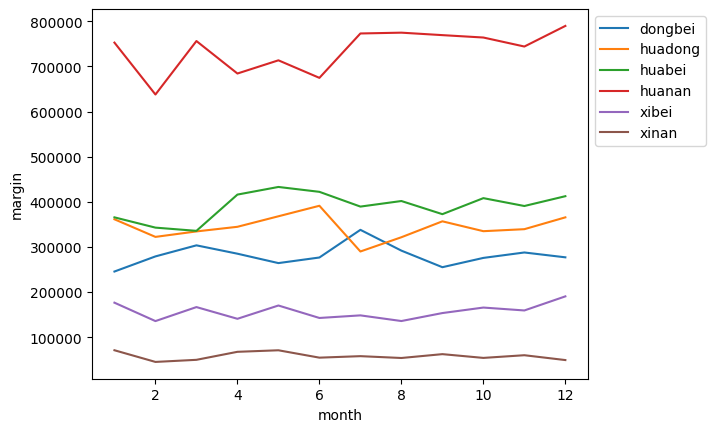

In [15]:
sns.lineplot(data=analysis1, x="month", y="margin", hue="区域")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

analysis1观察结果：(时间-区域纬度分析)

1.可以看出企业在华南地区获取的利润全年最高，且与其它区域形成较大差距，其次依次为华北、华东、东北、西北、西南区域；


In [30]:
analysis2 = cleaned_data[["托寄产品","物流总成本","销售数量","利润"]]
analysis2["单位产品总成本"] = analysis2["物流总成本"].div(analysis2["销售数量"]) 
analysis2.drop(["物流总成本","销售数量"], axis=1)
analysis2 = analysis2.groupby(["托寄产品"])[["单位产品总成本","利润"]].sum()
analysis2 = analysis2.reset_index()
analysis2.head()

/var/folders/c6/8jmdmmqn1mxd1g2vq4z6vzb80000gn/T/ipykernel_5586/1858856843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis2["单位产品总成本"] = analysis2["物流总成本"].div(analysis2["销售数量"])
/var/folders/c6/8jmdmmqn1mxd1g2vq4z6vzb80000gn/T/ipykernel_5586/1858856843.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analysis2 = analysis2.groupby(["托寄产品"])[["单位产品总成本","利润"]].sum()


,托寄产品,单位产品总成本,利润
0,办公家具,1941.396050,525649.80
1,卧室家具,10211.493291,2829835.67
2,厨房电器,11658.219242,3001276.15
3,家装饰品,12331.289873,3256085.90
4,床品件套,17048.181910,4469170.04


#### 分析analysis2

In [31]:
# 可视化图表中出现中文字体无法正确显示问题，可能是转化、编码等问题，采用英文字母替换
analysis2["托寄产品"] = analysis2["托寄产品"].replace({'床品件套':"bed_set", '汽车配件':"vehicle_parts", '浴室用品':"bathroom_parts", '家装饰品':"Home_decoration", '厨房电器':"Kitchen_appliances", '卧室家具':"Bedroom_furniture", '电脑硬件':"Computer_hardware", '办公家具':"Office_furniture "})
analysis2.rename(columns={"托寄产品":"product","单位产品总成本":"logis_per_cost","利润":"margin"}, inplace=True)


/var/folders/c6/8jmdmmqn1mxd1g2vq4z6vzb80000gn/T/ipykernel_5586/2013427526.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  analysis2["托寄产品"] = analysis2["托寄产品"].replace({'床品件套':"bed_set", '汽车配件':"vehicle_parts", '浴室用品':"bathroom_parts", '家装饰品':"Home_decoration", '厨房电器':"Kitchen_appliances", '卧室家具':"Bedroom_furniture", '电脑硬件':"Computer_hardware", '办公家具':"Office_furniture "})


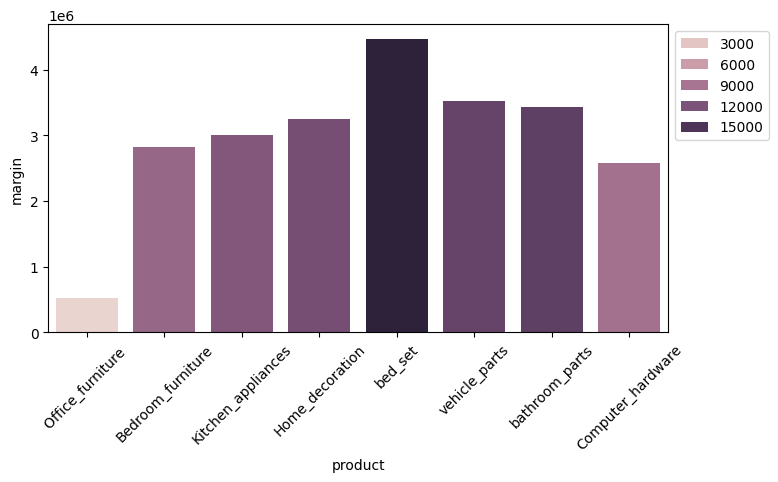

In [32]:
plt.figure(figsize=(8,4))  # 标签过长，调整图宽度以便正常显示
sns.barplot(data=analysis2, x="product", y="margin", hue="logis_per_cost")
plt.xticks(rotation=45)  # 标签过长，旋转轴标签以便正常显示
plt.legend(bbox_to_anchor=(1,1)) # 调整图例位置
plt.show()

观察结论：（产品-数量和利润纬度）

1.从数据结果看，床品套件销售数量最多，同时获得的利润最高；销售数量和利润最低的产品为办公家具，远远过后于其他产品。

#### 分析analysis3

In [19]:
analysis3 = cleaned_data[["托寄产品","客户性别","收入原价"]]
analysis3 = analysis3.groupby(["托寄产品", "客户性别"])[["收入原价"]].sum()
analysis3 = analysis3.reset_index()
analysis3.head()

/var/folders/c6/8jmdmmqn1mxd1g2vq4z6vzb80000gn/T/ipykernel_5586/1980853953.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analysis3 = analysis3.groupby(["托寄产品", "客户性别"])[["收入原价"]].sum()


,托寄产品,客户性别,收入原价
0,办公家具,女,238216.59
1,办公家具,男,318762.37
2,卧室家具,女,1663194.31
3,卧室家具,男,1335127.19
4,厨房电器,女,1607461.10


In [20]:
# 可视化图表中出现中文字体无法正确显示问题，可能是转化、编码等问题，采用英文字母替换
analysis3["客户性别"] = analysis3["客户性别"].replace({'男':"male", '女':"female"})
analysis3["托寄产品"] = analysis3["托寄产品"].replace({'床品件套':"bed_set", '汽车配件':"vehicle_parts", '浴室用品':"bathroom_parts", '家装饰品':"Home_decoration", '厨房电器':"Kitchen_appliances", '卧室家具':"Bedroom_furniture", '电脑硬件':"Computer_hardware", '办公家具':"Office_furniture "})
analysis3.rename(columns={"托寄产品":"product","客户性别":"gender","收入原价":"price"}, inplace=True)

/var/folders/c6/8jmdmmqn1mxd1g2vq4z6vzb80000gn/T/ipykernel_5586/2323111503.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  analysis3["客户性别"] = analysis3["客户性别"].replace({'男':"male", '女':"female"})
/var/folders/c6/8jmdmmqn1mxd1g2vq4z6vzb80000gn/T/ipykernel_5586/2323111503.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  analysis3["托寄产品"] = analysis3["托寄产品"].replace({'床品件套':"bed_set", '汽车配件':"vehicle_parts", '浴室用品':"bathroom_parts", '家装饰品':"Home_decoration", '厨房电器':"Kitchen_appliances", '卧室家具':"Bedroom_furniture", '电脑硬件':"Computer_hardware", '办公家具':"Office_fu

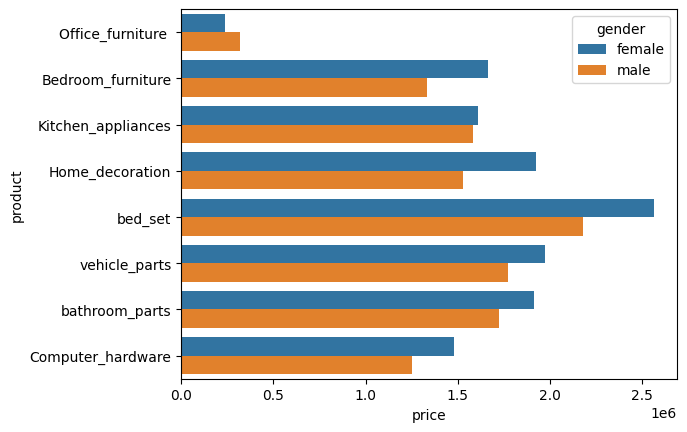

In [21]:
sns.barplot(analysis3, x="price", y="product", hue="gender")
plt.show()

观察结论：（男女消费差异纬度）

1.观察数据分析图可以发现，在卧室家具、家装饰品和床品套件方面男女消费量具有一定的差异；

2.进一步通过假设检验的方式进行显著性分析，分析男女在以上三类产品中的消费是否存在显著差异。

# 建立假设

$H_0$: 男性对产品的平均消费额小于女性消费额，不存在显著差异

$H_1$: 男性对产品的平均消费额小于女性消费额，存在显著差异

选择显著水平为0.05的单尾检验

In [22]:
from scipy.stats import ttest_ind # 引入t检验

In [23]:
analysis4 = cleaned_data[["托寄产品","客户性别","收入原价"]]
analysis4_male_1 = analysis4.query('(客户性别=="男") and (托寄产品=="床品件套")')  # 提取男性在床品件套中消费的数据
analysis4_female_1 = analysis4.query('(客户性别=="女") and (托寄产品=="床品件套")') # 提取女性在床品件套中消费的数据

In [24]:
t_stat, p_value = ttest_ind(analysis4_male_1["收入原价"], analysis4_female_1["收入原价"], alternative="less")
print(f"t值：{t_stat}")
print(f"p值：{p_value}")

t值：-0.6709838879362962
p值：0.2511376878457289


观察结论：由于p值大于显著性水平0.05，因此应当接受原假设，表明男女在床品件套的消费上不存在女性大于男性的显著性差异

In [25]:
analysis4_male_2 = analysis4.query('(客户性别=="男") and (托寄产品=="卧室家具")')  # 提取男性在床品件套中消费的数据
analysis4_female_2 = analysis4.query('(客户性别=="女") and (托寄产品=="卧室家具")') # 提取女性在床品件套中消费的数据

In [26]:
t_stat, p_value = ttest_ind(analysis4_male_2["收入原价"], analysis4_female_2["收入原价"], alternative="less")
print(f"t值：{t_stat}")
print(f"p值：{p_value}")

t值：-0.38601518071370194
p值：0.34976185398402815


观察结论：由于p值大于显著性水平0.05，因此应当接受原假设，表明男女在卧室家具的消费上不存在女性大于男性的显著性差异

In [27]:
analysis4_male_3 = analysis4.query('(客户性别=="男") and (托寄产品=="家装饰品")')  # 提取男性在床品件套中消费的数据
analysis4_female_3 = analysis4.query('(客户性别=="女") and (托寄产品=="家装饰品")') # 提取女性在床品件套中消费的数据

In [28]:
t_stat, p_value = ttest_ind(analysis4_male_3["收入原价"], analysis4_female_3["收入原价"], alternative="less")
print(f"t值：{t_stat}")
print(f"p值：{p_value}")

t值：-1.000582497934346
p值：0.1585633728701175


观察结论：由于p值大于显著性水平0.05，因此应当接受原假设，表明男女在家装饰品的消费上不存在女性大于男性的显著性差异

# 结论总结

1.企业在华南地区获取的利润全年最高，且与其它区域形成较大差距，其次依次为华北、华东、东北、西北、西南区域；

2.从数据结果看，床品套件销售数量最多，同时获得的利润最高；销售数量和利润最低的产品为办公家具，远远过后于其他产品；

3.表明男女性在不同产品上的消费，不存在女性大于男性的显著性差异，无需按照性别进行特定人群推广策略。